In [3]:
import requests
import pandas as pd
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

import sddk

In [43]:
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [44]:
# to access gsheet, you need Google Service Account key json file
# I have mine located in my personal space on sciencedata.dk, so I read it from there:

# (1) read the file and parse its content
file_data = sddk.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict", conf)# conf[0].get(conf[1] + "ServiceAccountsKey.json").json()
# (2) transform the content into crendentials object
credentials = service_account.Credentials.from_service_account_info(file_data)
# (3) specify your usage of the credentials
scoped_credentials = credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive'])
# (4) use the constrained credentials for authentication of gspread package
gc = gspread.Client(auth=scoped_credentials)
# (5) establish connection with spreadsheets specified by their url
coins_gsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1T5krnx1fzu_MrJTmfu3hS1Jpx_PC79D2J7cnkoJFi4s/edit?usp=sharing")

In [4]:
url = "http://nomisma.org/nomisma.org.jsonld"
nomisma = pd.read_json(url)

In [5]:
nomisma.head(5)

,@id,@type,http://purl.org/dc/terms/isReplacedBy,http://www.w3.org/2004/02/skos/core#changeNote,http://www.w3.org/2004/02/skos/core#inScheme,http://www.w3.org/2004/02/skos/core#prefLabel,http://purl.org/dc/terms/isPartOf,http://www.w3.org/2004/02/skos/core#definition,http://www.w3.org/2004/02/skos/core#exactMatch,http://www.w3.org/ns/prov#wasGeneratedBy,...,http://xmlns.com/foaf/0.1/depiction,http://www.w3.org/2000/01/rdf-schema#domain,http://www.w3.org/2000/01/rdf-schema#range,http://www.w3.org/2004/02/skos/core#notation,http://www.w3.org/2004/02/skos/core#defintion,http://nomisma.org/ontology#hasClosingDate,http://www.w3.org/2002/07/owl#deprecated,http://www.w3.org/2002/07/owl#inverseOf,http://www.w3.org/2004/02/skos/core#seeAlso,http://www.w3.org/2004/02/skos/core#definitition
0,http://nomisma.org/id/ric.2.ves.194,"[http://www.w3.org/2004/02/skos/core#Concept, ...",[{'@id': 'http://numismatics.org/ocre/id/ric.2...,[{'@id': 'http://nomisma.org/id/ric.2.ves.194#...,[{'@id': 'http://nomisma.org/id/'}],"[{'@language': 'en', '@value': 'ric.2.ves.194'}]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://nomisma.org/id/ric.2.ves.195,"[http://www.w3.org/2004/02/skos/core#Concept, ...",[{'@id': 'http://numismatics.org/ocre/id/ric.2...,[{'@id': 'http://nomisma.org/id/ric.2.ves.195#...,[{'@id': 'http://nomisma.org/id/'}],"[{'@language': 'en', '@value': 'ric.2.ves.195'}]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://nomisma.org/id/ric.2.ves.196,"[http://www.w3.org/2004/02/skos/core#Concept, ...",[{'@id': 'http://numismatics.org/ocre/id/ric.2...,[{'@id': 'http://nomisma.org/id/ric.2.ves.196#...,[{'@id': 'http://nomisma.org/id/'}],"[{'@language': 'en', '@value': 'ric.2.ves.196'}]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://nomisma.org/id/ric.2.ves.197,"[http://nomisma.org/ontology#TypeSeriesItem, h...",[{'@id': 'http://numismatics.org/ocre/id/ric.2...,[{'@id': 'http://nomisma.org/id/ric.2.ves.197#...,[{'@id': 'http://nomisma.org/id/'}],"[{'@language': 'en', '@value': 'ric.2.ves.197'}]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://nomisma.org/id/johannes_vii,"[http://www.w3.org/2004/02/skos/core#Concept, ...",NaN,[{'@id': 'http://nomisma.org/id/johannes_vii#p...,[{'@id': 'http://nomisma.org/id/'}],"[{'@language': 'nl', '@value': 'Johannes VII P...",[{'@id': 'http://nomisma.org/id/byzantine_numi...,"[{'@language': 'en', '@value': 'The Byzantine ...","[{'@id': 'https://www.freebase.com/m/0jtv8'}, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
nomisma_ids = nomisma["@id"].tolist()
nomisma_ids[:1000]

['http://nomisma.org/id/ric.2.ves.194',
 'http://nomisma.org/id/ric.2.ves.195',
 'http://nomisma.org/id/ric.2.ves.196',
 'http://nomisma.org/id/ric.2.ves.197',
 'http://nomisma.org/id/johannes_vii',
 'http://nomisma.org/id/ric.2.hdn.711e#provenance',
 'http://nomisma.org/id/ric.2.ves.192',
 'http://nomisma.org/id/c_nvmonivs_vaala_rrc',
 '_:Na56bcd8528c14ef288c73ecbc38380d3',
 '_:N8b0b9e508ee34b7cb5f2cf59006b0f10',
 'http://nomisma.org/id/ric.2.ves.198',
 'http://nomisma.org/id/ric.2.ves.199',
 '_:N9c3e011681dd4cbe8e966920a18e454e',
 'http://nomisma.org/id/ric.2.hdn.22a#provenance',
 'http://nomisma.org/id/ric.2.hdn.820#provenance',
 'http://nomisma.org/id/svoronos-1904-702#provenance',
 'http://nomisma.org/id/ariobarzanes_i#provenance',
 '_:Nd44687c5baf04d4192e937f14969b54c',
 '_:Nf025f8ea9e6443308a3d8d5940e3ad67',
 '_:N697f31d333f144f4871c387b33773f75',
 'http://nomisma.org/id/ric.2.hdn.930f#provenance',
 'http://nomisma.org/id/igch0451#provenance',
 'http://nomisma.org/id/rrc-285.7b#

In [42]:
nomisma_ids = []
for cid, cid_replaced in zip(nomisma["@id"].tolist(), nomisma["http://purl.org/dc/terms/isReplacedBy"].tolist()):
    try:
        nomisma_ids.append(cid_replaced[0]["@id"])
    except:
        nomisma_ids.append(cid)

In [50]:
ocre_urls = []
for nom_url in nomisma_ids:
    try:
        nom_id = nom_url.rpartition("/")[2]
        nom_id = nom_id.partition("#")[0]
        ocre_url = "http://numismatics.org/ocre/id/{0}".format(nom_id)
        ocre_urls.append(ocre_url)
    except:
        pass

In [51]:
ocre_urls = list(set(ocre_urls))

In [52]:
len(ocre_urls)

57010

In [53]:
ocre_urls

['http://numismatics.org/ocre/id/_:Nb6490e8d617d49f6895223947e85d180',
 'http://numismatics.org/ocre/id/rupert_vermont',
 'http://numismatics.org/ocre/id/rrc-532.1',
 'http://numismatics.org/ocre/id/_:Nd15f2de831024b959fa3a4c77d2e32bf',
 'http://numismatics.org/ocre/id/_:Ncb4565a060fe43f984ddbd2f00c35130',
 'http://numismatics.org/ocre/id/rrc-351.1',
 'http://numismatics.org/ocre/id/igch0040',
 'http://numismatics.org/ocre/id/_:N2a555c6aefdc4abbb46ad5d893119454',
 'http://numismatics.org/ocre/id/_:N3727a2a891684b278283aedccde52675',
 'http://numismatics.org/ocre/id/svoronos-1904.474',
 'http://numismatics.org/ocre/id/_:N57dd842ff4b141e2a927929eb2ffc06d',
 'http://numismatics.org/ocre/id/rrc-98A.4a',
 'http://numismatics.org/ocre/id/_:N47b6fa82d6754b309076779a33c0b856',
 'http://numismatics.org/ocre/id/_:N570592a7e5854c7caba2e320b680b37e',
 'http://numismatics.org/ocre/id/igch1684',
 'http://numismatics.org/ocre/id/rrc-339.4b',
 'http://numismatics.org/ocre/id/dionysius_i_syracuse',
 'h

In [59]:
ric_ids = [url.rpartition("/")[2] for url in ocre_urls if "/ric." in url]
ric_ids

['ric.2.hdn.551b',
 'ric.2.ves.641',
 'ric.2.tr.203',
 'ric.2.dom.182',
 'ric.2.tr.823a',
 'ric.2.ves.49',
 'ric.2.dom.304b',
 'ric.2.tr.228',
 'ric.2.tr.194',
 'ric.2.hdn.868f',
 'ric.2.ves.198',
 'ric.2.ves.727',
 'ric.2.hdn.710a',
 'ric.2.tr.816',
 'ric.2.hdn.763',
 'ric.2.ner.20',
 'ric.2.hdn.864',
 'ric.2.dom.242c',
 'ric.2.hdn.293a',
 'ric.2.anys.28',
 'ric.2.ves.246',
 'ric.2.dom.429b',
 'ric.2.hdn.1039',
 'ric.2.hdn.975c',
 'ric.2.hdn.300c',
 'ric.2.hdn.42b',
 'ric.2.ves.66b',
 'ric.2.dom.113',
 'ric.2.hdn.782d',
 'ric.2.tr.263a',
 'ric.2.hdn.769f',
 'ric.2.ves.241',
 'ric.2.ves.549a',
 'ric.2.ves.503',
 'ric.2.tit.27a',
 'ric.2.hdn.741c',
 'ric.2.ves.754b',
 'ric.2.hdn.603',
 'ric.2.anys.9',
 'ric.2.hdn.51a',
 'ric.2.hdn.329',
 'ric.2.tr.19',
 'ric.2.tr.540',
 'ric.2.dom.377',
 'ric.2.tit.228',
 'ric.2.hdn.851c',
 'ric.2.dom.298',
 'ric.2.hdn.63d',
 'ric.2.hdn.386',
 'ric.2.tr.43',
 'ric.2.tr.559',
 'ric.2.tr.94',
 'ric.2.dom.405',
 'ric.2.ves.716',
 'ric.2.ves.154',
 'ric.2.n

In [62]:
ric_ids_emperors = list(set([ric_id.rpartition(".")[0] for ric_id in ric_ids]))
ric_ids_emperors

['ric.2.ves',
 'ric.2.dom',
 'ric.2.hdn',
 'ric.2.tr',
 'ric.2.anys',
 'ric.2.ner',
 'ric.2.tit']

In [31]:
ric_1_2_urls = [url.replace("ric.2", "ric.2_1(2)") for url in ocre_urls if "ric.2" in url]
ric_1_2_urls[:10]

['http://numismatics.org/ocre/id/ric.2_1(2).ves.194.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).ves.195.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).ves.196.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).ves.197.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).hdn.711e#provenance.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).ves.192.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).ves.198.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).ves.199.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).hdn.22a#provenance.jsonld',
 'http://numismatics.org/ocre/id/ric.2_1(2).hdn.820#provenance.jsonld']

In [44]:
ns = range(0, len(ocre_urls), 100)
ocre_data = []
for url, n in zip(ocre_urls, range(len(ocre_urls))):
    try:
        resp = requests.get(url)
        if resp.ok:
            ocre_data.append(resp.json())
        if n in ns:
            print("url processed: {0}, success: {1}".format(n, len(ocre_data)))
    except:
        pass

url processed: 0, success: 0
url processed: 100, success: 3
url processed: 200, success: 4
url processed: 300, success: 9
url processed: 400, success: 15
url processed: 500, success: 23
url processed: 600, success: 23
url processed: 700, success: 27
url processed: 800, success: 30
url processed: 900, success: 36
url processed: 1000, success: 39
url processed: 1100, success: 55
url processed: 1200, success: 63
url processed: 1300, success: 64
url processed: 1500, success: 77
url processed: 1600, success: 77
url processed: 1700, success: 79
url processed: 1800, success: 92
url processed: 1900, success: 98
url processed: 2000, success: 98
url processed: 2100, success: 104
url processed: 2200, success: 105
url processed: 2300, success: 106
url processed: 2400, success: 106
url processed: 2500, success: 107
url processed: 2600, success: 107
url processed: 2700, success: 111
url processed: 2800, success: 121
url processed: 2900, success: 126
url processed: 3000, success: 128
url processed: 3

url processed: 25100, success: 939
url processed: 25200, success: 939
url processed: 25300, success: 941
url processed: 25400, success: 947
url processed: 25500, success: 948
url processed: 25600, success: 951
url processed: 25700, success: 953
url processed: 25800, success: 956
url processed: 25900, success: 965
url processed: 26000, success: 968
url processed: 26100, success: 974
url processed: 26200, success: 977
url processed: 26300, success: 980
url processed: 26400, success: 980
url processed: 26500, success: 981
url processed: 26600, success: 982
url processed: 26700, success: 990
url processed: 26800, success: 990
url processed: 26900, success: 990
url processed: 27000, success: 998
url processed: 27100, success: 999
url processed: 27200, success: 1003
url processed: 27300, success: 1005
url processed: 27400, success: 1008
url processed: 27500, success: 1013
url processed: 27600, success: 1013
url processed: 27800, success: 1018
url processed: 27900, success: 1020
url processed

url processed: 48700, success: 1801
url processed: 48800, success: 1804
url processed: 48900, success: 1808
url processed: 49000, success: 1815
url processed: 49100, success: 1817
url processed: 49200, success: 1818
url processed: 49300, success: 1821
url processed: 49400, success: 1822
url processed: 49500, success: 1824
url processed: 49600, success: 1836
url processed: 49700, success: 1836
url processed: 49800, success: 1837
url processed: 49900, success: 1839
url processed: 50000, success: 1843
url processed: 50100, success: 1843
url processed: 50300, success: 1857
url processed: 50400, success: 1858
url processed: 50500, success: 1860
url processed: 50600, success: 1867
url processed: 50700, success: 1869
url processed: 50800, success: 1871
url processed: 50900, success: 1871
url processed: 51000, success: 1873
url processed: 51100, success: 1876
url processed: 51300, success: 1878
url processed: 51400, success: 1882
url processed: 51500, success: 1886
url processed: 51600, succes

url processed: 72300, success: 2599
url processed: 72400, success: 2603
url processed: 72500, success: 2604
url processed: 72600, success: 2607
url processed: 72700, success: 2624
url processed: 72800, success: 2628
url processed: 72900, success: 2631
url processed: 73000, success: 2633
url processed: 73100, success: 2633
url processed: 73200, success: 2633
url processed: 73300, success: 2634
url processed: 73400, success: 2637
url processed: 73500, success: 2639
url processed: 73600, success: 2641
url processed: 73700, success: 2643
url processed: 73800, success: 2645
url processed: 73900, success: 2649
url processed: 74000, success: 2651
url processed: 74200, success: 2659
url processed: 74300, success: 2661
url processed: 74400, success: 2665
url processed: 74500, success: 2668
url processed: 74600, success: 2670
url processed: 74700, success: 2675
url processed: 74800, success: 2675
url processed: 74900, success: 2677
url processed: 75000, success: 2678
url processed: 75100, succes

In [45]:
# save the data
with open('../data/ocre_data_raw_test.pkl', 'wb') as f:
    pickle.dump(ocre_data, f)

In [3]:
# load the data back
with open('../data/ocre_data_raw_test.pkl', 'rb') as f:
    ocre_data = pickle.load(f)

In [19]:
ocre_data[:10]

[{'@context': {'crmarchaeo': 'http://www.cidoc-crm.org/cidoc-crm/CRMarchaeo/',
   'dcterms': 'http://purl.org/dc/terms/',
   'relations': 'http://pelagios.github.io/vocab/relations#',
   'edm': 'http://www.europeana.eu/schemas/edm/',
   'nm': 'http://nomisma.org/id/',
   'svcs': 'http://rdfs.org/sioc/services#',
   'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
   'doap': 'http://usefulinc.com/ns/doap#',
   'rdfs': 'http://www.w3.org/2000/01/rdf-schema#',
   'crm': 'http://www.cidoc-crm.org/cidoc-crm/',
   'oa': 'http://www.w3.org/ns/oa#',
   'skos': 'http://www.w3.org/2004/02/skos/core#',
   'xsd': 'http://www.w3.org/2001/XMLSchema#',
   'pelagios': 'http://pelagios.github.io/vocab/terms#',
   'foaf': 'http://xmlns.com/foaf/0.1/',
   'un': 'http://www.owl-ontologies.com/Ontology1181490123.owl#',
   'void': 'http://rdfs.org/ns/void#',
   'dcmitype': 'http://purl.org/dc/dcmitype/',
   'nmo': 'http://nomisma.org/ontology#',
   'crmsci': 'http://www.ics.forth.gr/isl/CRMsci/',
   'g

In [4]:
keys = list(ocre_data[0]["@graph"][0].keys())
len(keys)

20

In [6]:
keys = []
for el in ocre_data:
    keys.extend(list(el["@graph"][0].keys()))

In [9]:
keys = list(set(keys))
keys

['nmo:hasAuthority',
 '@type',
 'dcterms:isReplacedBy',
 'dcterms:source',
 'rdf:type',
 'nmo:hasMint',
 'nmo:representsObjectType',
 'nmo:hasObverse',
 'skos:exactMatch',
 'nmo:hasManufacture',
 'nmo:hasRegion',
 'dcterms:replaces',
 'nmo:hasDenomination',
 'void:inDataset',
 '@id',
 'nmo:hasStartDate',
 'nmo:hasEndDate',
 'nmo:hasMaterial',
 'skos:prefLabel',
 'nmo:hasReverse',
 'skos:definition']

In [10]:
data_values = []
for el in ocre_data:
    el_data_values = []
    
    el_data = el["@graph"][0]
    for key in keys:
        try:
            new_data = el_data[key][0]["@id"]
        except:
            try:
                new_data = el_data[key][0]["@value"]
            except:
                try:
                    new_data = el_data[key]
                except:
                    new_data = None
        if isinstance(new_data, str):
            new_data = new_data.rpartition("/")[2]
        el_data_values.append(new_data)
    data_values.append(el_data_values)

In [11]:
ocre_data_df = pd.DataFrame(data_values, columns=keys)
ocre_data_df.head(5)

,nmo:hasAuthority,@type,dcterms:isReplacedBy,dcterms:source,rdf:type,nmo:hasMint,nmo:representsObjectType,nmo:hasObverse,skos:exactMatch,nmo:hasManufacture,...,dcterms:replaces,nmo:hasDenomination,void:inDataset,@id,nmo:hasStartDate,nmo:hasEndDate,nmo:hasMaterial,skos:prefLabel,nmo:hasReverse,skos:definition
0,hadrian,"[nmo:TypeSeriesItem, http://www.w3.org/2004/02...",ric.2_3(2).hdn.1914,ric,[http://www.w3.org/2004/02/skos/core#Concept],rome,coin,ric.2.hdn.747h#obverse,ric.2_3(2).hdn.1914,struck,...,None,sestertius,,ric.2.hdn.747h,0134,0138,ae,RIC II Hadrian 747h,ric.2.hdn.747h#reverse,RIC II Hadrian 747h
1,trajan,"[nmo:TypeSeriesItem, http://www.w3.org/2004/02...",None,ric,[http://www.w3.org/2004/02/skos/core#Concept],rome,coin,ric.2.tr.85#obverse,None,struck,...,None,denarius,,ric.2.tr.85,0103,0111,ar,RIC II Trajan 85,ric.2.tr.85#reverse,RIC II Trajan 85
2,hadrian,"[nmo:TypeSeriesItem, http://www.w3.org/2004/02...",ric.2_3(2).hdn.2791,ric,[http://www.w3.org/2004/02/skos/core#Concept],rome,coin,ric.2.hdn.142#obverse,ric.2_3(2).hdn.2791,struck,...,None,denarius,,ric.2.hdn.142,0119,0122,ar,RIC II Hadrian 142,ric.2.hdn.142#reverse,RIC II Hadrian 142
3,hadrian,"[nmo:TypeSeriesItem, http://www.w3.org/2004/02...",ric.2.hdn.988_as,ric,[http://www.w3.org/2004/02/skos/core#Concept],rome,coin,ric.2.hdn.988#obverse,None,struck,...,None,dupondius,,ric.2.hdn.988,0132,0134,orichalcum,RIC II Hadrian 988,ric.2.hdn.988#reverse,RIC II Hadrian 988
4,hadrian,"[nmo:TypeSeriesItem, http://www.w3.org/2004/02...",ric.2_3(2).hdn.827,ric,[http://www.w3.org/2004/02/skos/core#Concept],rome,coin,ric.2.hdn.640a#obverse,ric.2_3(2).hdn.827,struck,...,None,sestertius,,ric.2.hdn.640a,0125,0128,ae,RIC II Hadrian 640a,ric.2.hdn.640a#reverse,RIC II Hadrian 640a


In [46]:
len(ocre_data_df)

2793

In [49]:
ocre_data_df.groupby("nmo:hasAuthority").size()

nmo:hasAuthority
anonymous      37
hadrian      1854
nerva         141
trajan        754
dtype: int64

In [45]:
set_with_dataframe(coins_gsheet.add_worksheet("ocre_data_test1", 1,1), ocre_data_df)

In [35]:
enddates = ocre_data_df["nmo:hasEndDate"].astype(float, errors = "ignore").tolist()
#enddates = [date for date in enddates if isinstance(date, int)]

In [40]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

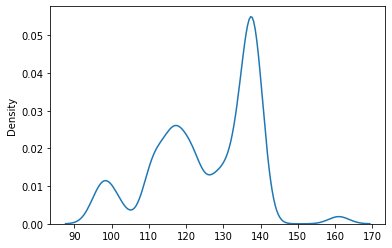

In [41]:
sns.kdeplot(enddates)